### Intelligent Complaint Analysis for Financial Services


C:\Users\surap\AppData\Local\Temp\ipykernel_21124\2342216830.py:9: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/complaints.csv')


Total complaints: 9609797

Missing values:
Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64

Complaints with narratives: 82164


100%|██████████| 82164/82164 [00:03<00:00, 24454.99it/s]


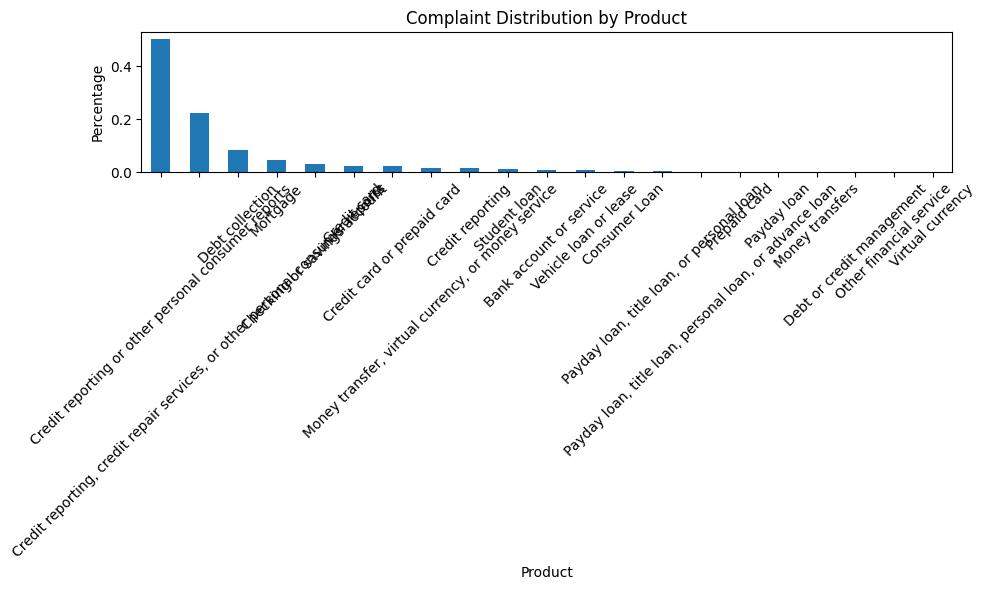

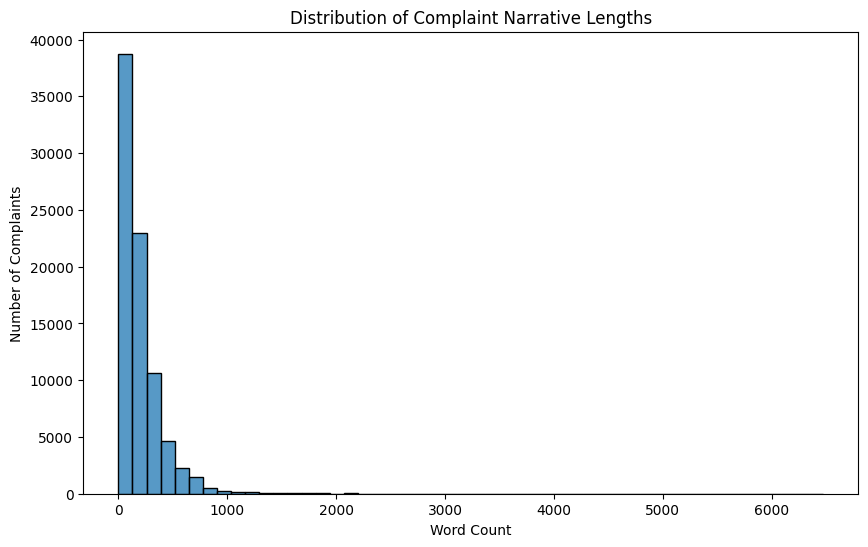

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm

# Load data
df = pd.read_csv('../data/complaints.csv')

# Initial EDA
print(f"Total complaints: {len(df)}")
print("\nMissing values:")
print(df.isnull().sum())

# Product distribution
product_dist = df['Product'].value_counts(normalize=True)
plt.figure(figsize=(10,6))
product_dist.plot(kind='bar')
plt.title('Complaint Distribution by Product')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('product_distribution.png')

# Filter to our target products
target_products = [
    'Credit card', 
    'Personal loan', 
    'Buy Now, Pay Later (BNPL)', 
    'Savings account',
    'Money transfers'
]
filtered_df = df[df['Product'].isin(target_products)].copy()

# Narrative length analysis
filtered_df['narrative_length'] = filtered_df['Consumer complaint narrative'].str.split().str.len()
plt.figure(figsize=(10,6))
sns.histplot(filtered_df['narrative_length'].dropna(), bins=50)
plt.title('Distribution of Complaint Narrative Lengths')
plt.xlabel('Word Count')
plt.ylabel('Number of Complaints')
plt.savefig('narrative_length_distribution.png')

# Remove empty narratives
filtered_df = filtered_df.dropna(subset=['Consumer complaint narrative'])
print(f"\nComplaints with narratives: {len(filtered_df)}")

# Text cleaning function
def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    # Lowercase
    text = text.lower()
    
    # Remove common complaint boilerplate
    boilerplates = [
        r'i am writing to file a complaint',
        r'this is a complaint regarding',
        r'dear sir/madam',
        r'to whom it may concern'
    ]
    for pattern in boilerplates:
        text = re.sub(pattern, '', text)
    
    # Remove special characters except basic punctuation
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# Apply cleaning
tqdm.pandas()
filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].progress_apply(clean_text)

# Save cleaned data
filtered_df.to_csv('../data/filtered_complaints.csv', index=False)